# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.15/x64/bin/python -m pip install --upgrade pip' command.


## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


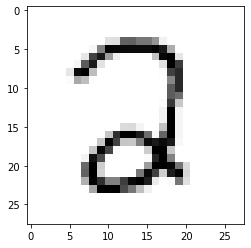

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2343
Training Accuracy: 0.7205, Testing Accuracy: 0.7223



Epoch 10, Loss 0.0934
Training Accuracy: 0.9238, Testing Accuracy: 0.9365



Epoch 20, Loss 0.0549
Training Accuracy: 0.9462, Testing Accuracy: 0.9607



Epoch 30, Loss 0.0428
Training Accuracy: 0.9538, Testing Accuracy: 0.9647



Epoch 40, Loss 0.0369
Training Accuracy: 0.9599, Testing Accuracy: 0.9667



Epoch 50, Loss 0.0333
Training Accuracy: 0.9637, Testing Accuracy: 0.9688



Epoch 60, Loss 0.0308
Training Accuracy: 0.9655, Testing Accuracy: 0.9693



Epoch 70, Loss 0.0289
Training Accuracy: 0.9678, Testing Accuracy: 0.9703



Epoch 80, Loss 0.0274
Training Accuracy: 0.9691, Testing Accuracy: 0.9713



Epoch 90, Loss 0.0262
Training Accuracy: 0.9696, Testing Accuracy: 0.9738



Epoch 100, Loss 0.0252
Training Accuracy: 0.9705, Testing Accuracy: 0.9738



Epoch 110, Loss 0.0243
Training Accuracy: 0.9720, Testing Accuracy: 0.9753



Epoch 120, Loss 0.0235
Training Accuracy: 0.9730, Testing Accuracy: 0.9748



Epoch 130, Loss 0.0228
Training Accuracy: 0.9734, Testing Accuracy: 0.9753



Epoch 140, Loss 0.0222
Training Accuracy: 0.9740, Testing Accuracy: 0.9748



Epoch 150, Loss 0.0216
Training Accuracy: 0.9752, Testing Accuracy: 0.9748



Epoch 160, Loss 0.021
Training Accuracy: 0.9760, Testing Accuracy: 0.9743



Epoch 170, Loss 0.0205
Training Accuracy: 0.9765, Testing Accuracy: 0.9748



Epoch 180, Loss 0.02
Training Accuracy: 0.9773, Testing Accuracy: 0.9743



Epoch 190, Loss 0.0195
Training Accuracy: 0.9777, Testing Accuracy: 0.9738



Epoch 200, Loss 0.0191
Training Accuracy: 0.9786, Testing Accuracy: 0.9738



Epoch 210, Loss 0.0187
Training Accuracy: 0.9791, Testing Accuracy: 0.9748



Epoch 220, Loss 0.0183
Training Accuracy: 0.9796, Testing Accuracy: 0.9748



Epoch 230, Loss 0.0179
Training Accuracy: 0.9801, Testing Accuracy: 0.9753



Epoch 240, Loss 0.0175
Training Accuracy: 0.9807, Testing Accuracy: 0.9753



0.003219090167397953

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2183
Training Accuracy: 0.7858, Testing Accuracy: 0.8115



Epoch 10, Loss 0.1007
Training Accuracy: 0.9130, Testing Accuracy: 0.9234



Epoch 20, Loss 0.0785
Training Accuracy: 0.9281, Testing Accuracy: 0.9390



Epoch 30, Loss 0.068
Training Accuracy: 0.9364, Testing Accuracy: 0.9466



Epoch 40, Loss 0.0616
Training Accuracy: 0.9408, Testing Accuracy: 0.9481



Epoch 50, Loss 0.0572
Training Accuracy: 0.9443, Testing Accuracy: 0.9521



Epoch 60, Loss 0.054
Training Accuracy: 0.9463, Testing Accuracy: 0.9546



Epoch 70, Loss 0.0515
Training Accuracy: 0.9483, Testing Accuracy: 0.9567



Epoch 80, Loss 0.0494
Training Accuracy: 0.9495, Testing Accuracy: 0.9582



Epoch 90, Loss 0.0478
Training Accuracy: 0.9506, Testing Accuracy: 0.9597



Epoch 100, Loss 0.0464
Training Accuracy: 0.9513, Testing Accuracy: 0.9597



Epoch 110, Loss 0.0452
Training Accuracy: 0.9522, Testing Accuracy: 0.9597



Epoch 120, Loss 0.0441
Training Accuracy: 0.9528, Testing Accuracy: 0.9607



Epoch 130, Loss 0.0432
Training Accuracy: 0.9536, Testing Accuracy: 0.9607



Epoch 140, Loss 0.0423
Training Accuracy: 0.9546, Testing Accuracy: 0.9622



Epoch 150, Loss 0.0416
Training Accuracy: 0.9553, Testing Accuracy: 0.9632



Epoch 160, Loss 0.0409
Training Accuracy: 0.9562, Testing Accuracy: 0.9637



Epoch 170, Loss 0.0403
Training Accuracy: 0.9571, Testing Accuracy: 0.9642



Epoch 180, Loss 0.0397
Training Accuracy: 0.9577, Testing Accuracy: 0.9647



Epoch 190, Loss 0.0392
Training Accuracy: 0.9581, Testing Accuracy: 0.9652



Epoch 200, Loss 0.0387
Training Accuracy: 0.9584, Testing Accuracy: 0.9652



Epoch 210, Loss 0.0383
Training Accuracy: 0.9586, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0379
Training Accuracy: 0.9590, Testing Accuracy: 0.9652



Epoch 230, Loss 0.0375
Training Accuracy: 0.9597, Testing Accuracy: 0.9652



Epoch 240, Loss 0.0371
Training Accuracy: 0.9600, Testing Accuracy: 0.9652



0.02798497562167193

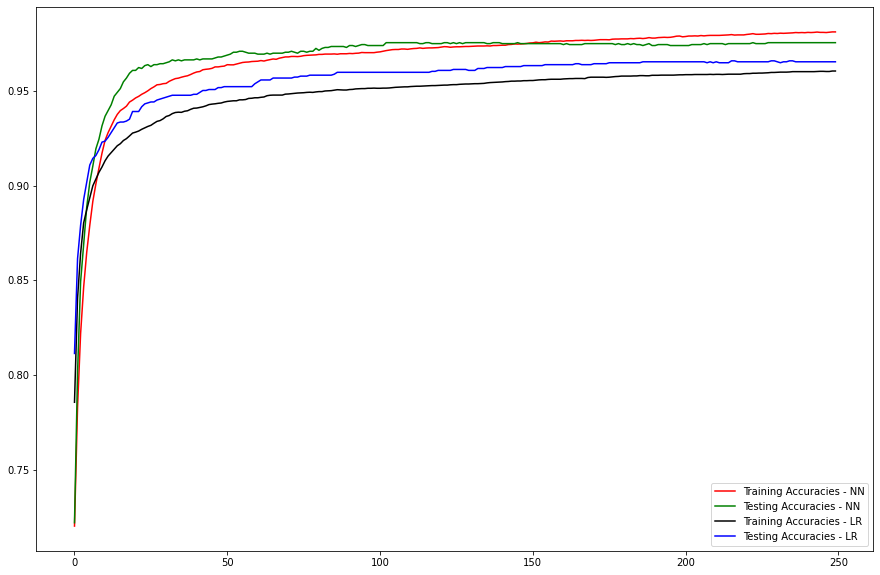

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

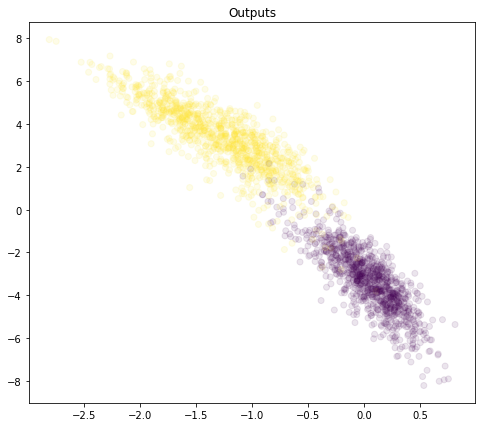

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

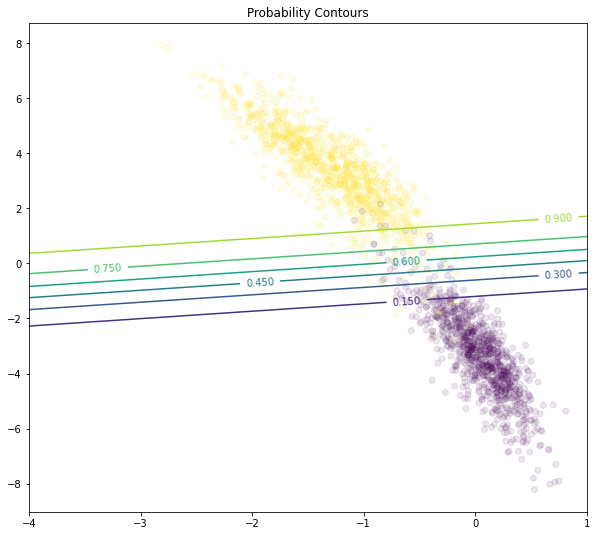

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );